In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from math import pi
#data = np.loadtxt("mlDataPredictionsNewNorm.txt")
#np.save("mlDataPredictionsNewNorm.npy", data)
firstData = np.load("mlDataPredictionsNewNorm.npy")
print(firstData.shape)

(210519, 16)


In [9]:
newData=[]
for x in range(len(firstData)):
    if(True or firstData[x,13]<-2.4 or firstData[x,13]>=2.4):
    #if(True or firstData[x,14]<=pi/2):
        newData.append(firstData[x])
data=np.array(newData).T

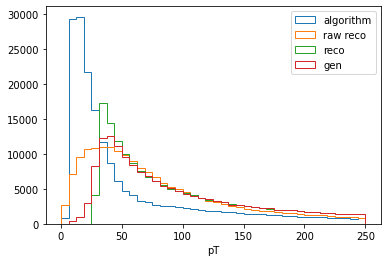

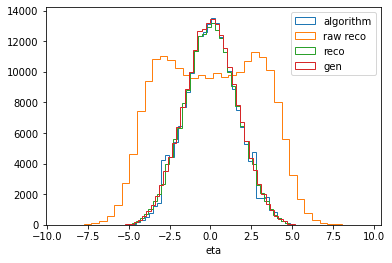

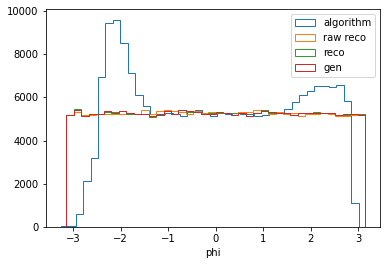

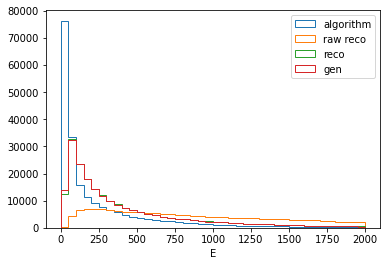

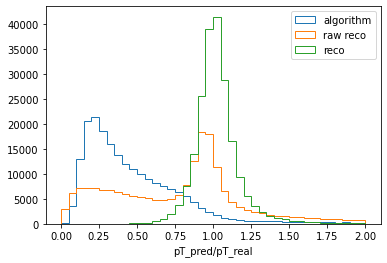

In [10]:
plt.figure()
plt.hist(data[0], range=(0,250), bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4], range=(0,250), bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8], range=(0,250), bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12], range=(0,250), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("pT")
plt.legend()
plt.show()

x=1
plt.figure()
plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4+x], bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8+x], bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("eta")
plt.legend()
plt.show()
x=2
plt.figure()
#plt.hist(((data[0+x]+pi)%(2*pi))-pi, bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4+x], bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8+x], bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("phi")
plt.legend()
plt.show()
x=3
plt.figure()
plt.hist(data[0+x], range=(0,2000), bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4+x], range=(0,2000), bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8+x], range=(0,2000), bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12+x], range=(0,2000), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("E")
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,2), alpha=1, histtype="step")
plt.hist(np.abs(data[4])/data[12], label="raw reco", bins=40, range=(0,2), alpha=1, histtype="step")
plt.hist(np.abs(data[8])/data[12], label="reco", bins=40, range=(0,2), alpha=1, histtype="step")
plt.xlabel("pT_pred/pT_real")
plt.legend()
plt.show()
    

In [11]:
from math import pi

def dR(y_true, y_pred):
    
    
    truePT=y_true[:,0]
    trueEta=y_true[:,1]
    truePhi=y_true[:,2]
    
    predPT=y_pred[:,0]
    predEta=y_pred[:,1]
    predPhi=y_pred[:,2]
    
    raw_dphi = truePhi - predPhi;
    dphi = tf.where(tf.abs(raw_dphi)<pi, raw_dphi, raw_dphi-2*pi*tf.math.round(raw_dphi/2*pi))
    
    deta = trueEta - predEta;
    val=tf.math.pow(tf.math.pow(deta,2)+tf.math.pow(dphi,2),0.5)
    return(val)


    
def dPT(y_true, y_pred):
   
    truePT = y_true[:,0]
    
    predPT = y_pred[:,0]
    
    val=tf.math.divide(predPT,truePT)
    #print(val)
    return(tf.reduce_mean(val))

In [12]:
model = tf.keras.models.load_model("jet_correction_alg_long_fixed_phi2", compile=False)#,custom_objects={"custom_loss": custom_loss})
model.compile(optimizer=tf.keras.optimizers.Adam(0.01,
                  amsgrad=True),loss=tf.keras.losses.MeanSquaredError(),
                  metrics=["mae", "mse",dPT, dR])

inputData = np.copy(data[0:4,:])
#inputData[0]=(inputData[0]-169.01004193853493)/235.62728352292638
#inputData[1]=(inputData[1]-0.018936077465366852)/1.6201862816975245
#inputData[2]=(inputData[2]+0.02655485593591482)/1.7627136447251803
#inputData[3]=(inputData[3]-357.5591001204404)/416.86786565598675
inputData[0]=(inputData[0]-186.1807247645679)/226.7636813154507
inputData[1]=(inputData[1]-0.0021791017691582763)/1.6003339732245463
inputData[3]=(inputData[3]-386.196770822742)/400.395297261051

print(inputData.shape)
predictions = model.predict(inputData.T).T
print(predictions.shape)
predictions[0]=(predictions[0]*272.11917496982136)+210.54679049884757
predictions[1]=(predictions[1]*1.6144690552693344)+0.006930566673335255
#predictions[2]=(predictions[2]*1.8119944463562856)-0.0017255347675693834
predictions[3]=(predictions[3]*530.4401108027902)+468.2630491153848



model2 = tf.keras.models.load_model("jet_correction_reco_long_fixed_phi", compile=False)#,custom_objects={"custom_loss": custom_loss})
model2.compile(optimizer=tf.keras.optimizers.Adam(0.01,
                  amsgrad=True),loss=tf.keras.losses.MeanSquaredError(),
                  metrics=["mae", "mse",dPT, dR])

inputData = np.copy(data[8:12,:])
inputData[0]=(inputData[0]-210.89893473110538)/271.56276404134087
inputData[1]=(inputData[1]-0.006852298549000771)/1.613049979314195
#inputData[2]=(inputData[2]+0.0013696488553793338)/1.8119479272282428
inputData[3]=(inputData[3]-472.777121068376)/534.7531856394951

print(inputData.shape)
predictions2 = model2.predict(inputData.T).T
print(predictions.shape)
predictions2[0]=(predictions2[0]*272.11917496982136)+210.54679049884757
predictions2[1]=(predictions2[1]*1.6144690552693344)+0.006930566673335255
#predictions2[2]=(predictions2[2]*1.8119944463562856)-0.0017255347675693834
predictions2[3]=(predictions2[3]*530.4401108027902)+468.2630491153848

(4, 210519)
(4, 210519)
(4, 210519)
(4, 210519)


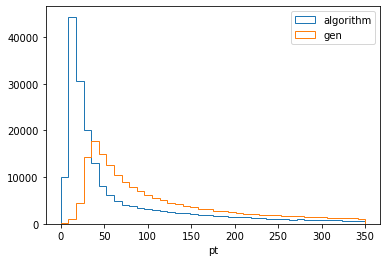

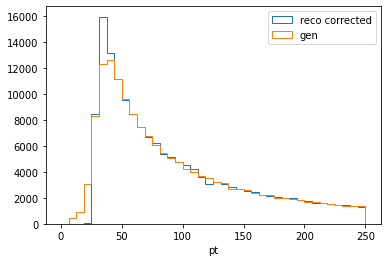

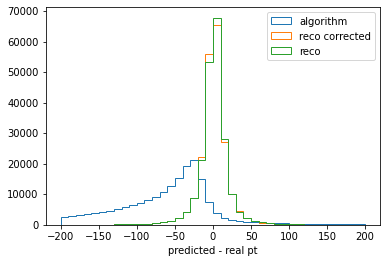

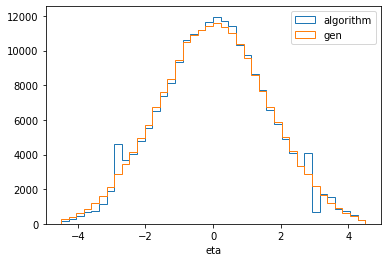

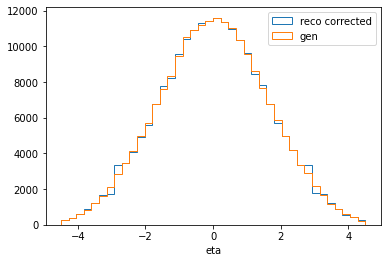

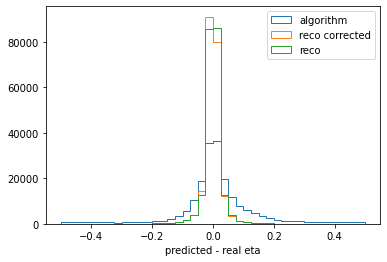

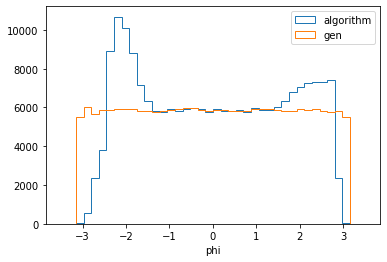

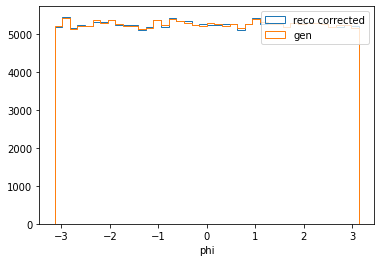

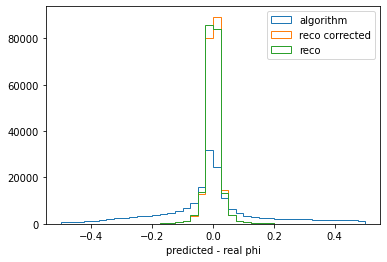

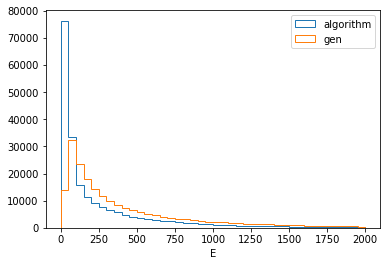

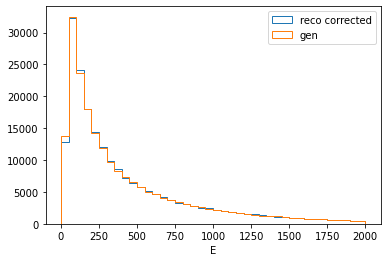

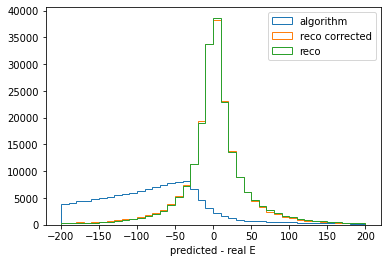

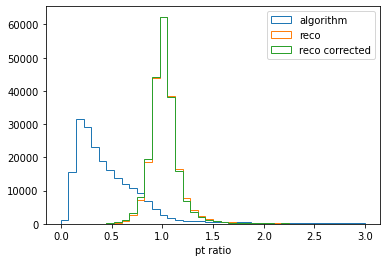

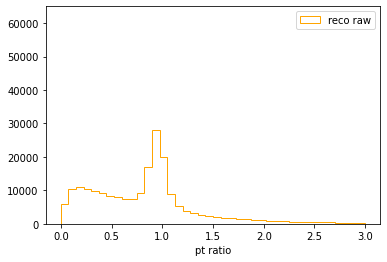

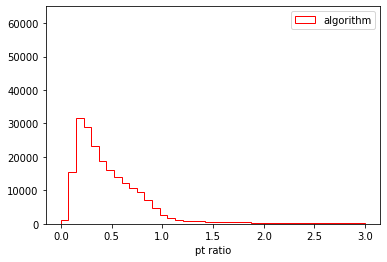

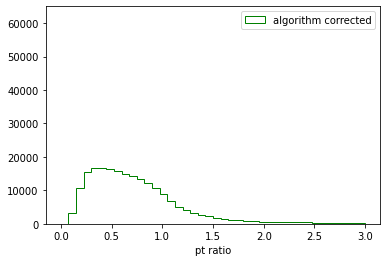

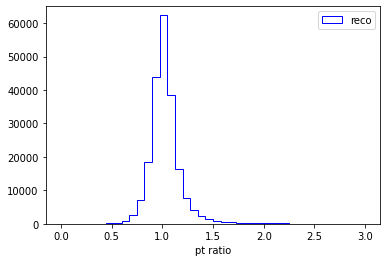

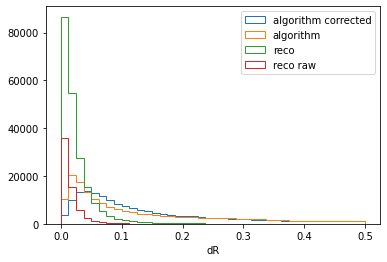

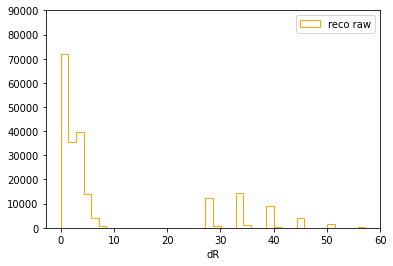

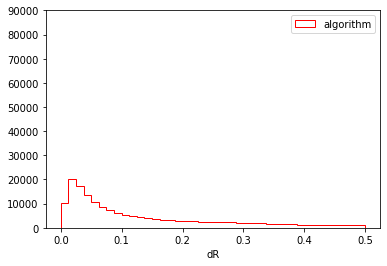

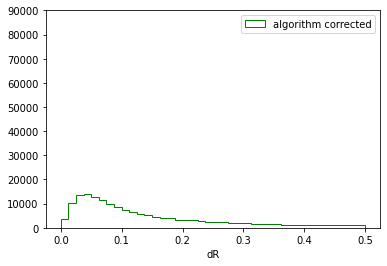

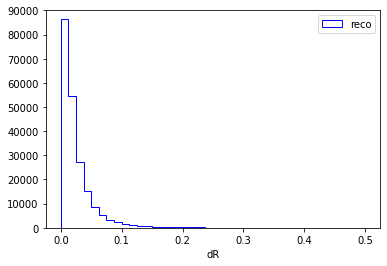

In [13]:
from math import pi
x=0
plt.figure()
plt.hist(data[0], range=(0,350), bins=40, label="algorithm", alpha=1, histtype="step")
#plt.hist(predictions[0], range=(0,350), bins=40, label="algorithm corrected", alpha=1, histtype="step")
#plt.hist(data[8], range=(0,3000), bins=100, label="reco")
plt.hist(data[12], range=(0,350), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("pt")
plt.legend()
plt.show()

plt.figure()
#plt.hist(predictions[0], range=(0,3000), bins=100, label="algorithm corrected")
#plt.hist(data[8], range=(0,250), bins=40, label="reco", alpha=1, histtype="step")
plt.hist(predictions2[0], range=(0,250), bins=40, label="reco corrected", alpha=1, histtype="step")
plt.hist(data[12], range=(0,250), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("pt")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-200,200))
plt.hist(predictions2[0+x]-data[12+x], histtype="step", label="reco corrected", bins = 40,  range=(-200,200))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-200,200))
plt.xlabel("predicted - real pt")
plt.legend()
plt.show()
x=1

plt.figure()
#plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, range=(-4.5,4.5), histtype="step")
plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, range=(-4.5,4.5), histtype="step")
#plt.hist(data[8+x], bins=100, label="reco", alpha=0.25)
plt.hist(data[12+x], bins=40, label="gen", alpha=1, range=(-4.5,4.5), histtype="step")
plt.xlabel("eta")
plt.legend()
plt.show()

plt.figure()
#plt.hist(predictions[0+x], bins=100, label="algorithm corrected", alpha=0.25)
#plt.hist(data[8+x], bins=40, label="reco", alpha=1, range=(-4.5,4.5), histtype="step")
plt.hist(predictions2[0+x], bins=40, label="reco corrected", alpha=1, range=(-4.5,4.5), histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, range=(-4.5,4.5), histtype="step")
plt.xlabel("eta")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-.5,.5))
plt.hist(predictions2[0+x]-data[12+x], histtype="step", label="reco corrected", bins = 40,  range=(-.5,.5))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-.5,.5))
plt.xlabel("predicted - real eta")
plt.legend()
plt.show()

x=2

plt.figure()
#plt.hist(((data[0+x]+pi)%(2*pi))-pi, bins=40, label="algorithm", alpha=1, range=(-3.5,3.5), histtype="step")
plt.hist(((data[0+x]+pi)%(2*pi))-pi, bins=40, label="algorithm", alpha=1, range=(-3.5,3.5), histtype="step")
#plt.hist(data[8+x], bins=100, label="reco", alpha=0.25)
plt.hist(((data[12+x]+pi)%(2*pi))-pi, bins=40, label="gen", alpha=1, range=(-3.5,3.5), histtype="step")
plt.xlabel("phi")
plt.legend()
plt.show()

plt.figure()
#plt.hist(predictions[0+x], bins=100, label="algorithm corrected", alpha=0.25)
#plt.hist(((data[8+x]+pi)%(2*pi))-pi, bins=40, label="reco", alpha=1, histtype="step")
plt.hist(((predictions2[0+x]+pi)%(2*pi))-pi, bins=40, label="reco corrected", alpha=1, histtype="step")
plt.hist(((data[12+x]+pi)%(2*pi))-pi, bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("phi")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-.5,.5))
plt.hist(predictions2[0+x]-data[12+x], histtype="step", label="reco corrected", bins = 40,  range=(-.5,.5))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-.5,.5))
plt.xlabel("predicted - real phi")
plt.legend()
plt.show()

x=3

plt.figure()
#plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, range=(0,2000), histtype="step")
plt.hist(data[0+x], bins=40, label="algorithm", range=(0,2000), alpha=1, histtype="step")
#plt.hist(data[8+x], bins=100, label="reco", alpha=0.25)
plt.hist(data[12+x], bins=40, label="gen", range=(0,2000), alpha=1, histtype="step")
plt.legend()
plt.xlabel("E")
plt.show()

plt.figure()
#plt.hist(predictions[0+x], bins=100, label="algorithm corrected", alpha=0.25)
#plt.hist(data[8+x], bins=40, label="reco", alpha=1, range=(0,2000), histtype="step")
plt.hist(predictions2[0+x], bins=40, label="reco corrected", alpha=1, range=(0,2000), histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, range=(0,2000), histtype="step")
plt.xlabel("E")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-200,200))
plt.hist(predictions2[0+x]-data[12+x], histtype="step", label="reco corrected", bins = 40,  range=(-200,200))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-200,200))
plt.xlabel("predicted - real E")
plt.legend()
plt.show()


plt.figure()
#plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,3), alpha=1, histtype="step")
plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,3), alpha=1, histtype="step")
plt.hist(np.abs(data[8])/data[12], label="reco", bins=40, range=(0,3), alpha=1, histtype="step")
plt.hist(np.abs(predictions2[0])/data[12], label="reco corrected", bins=40, range=(0,3), alpha=1, histtype="step")
plt.xlabel("pt ratio")
plt.legend()
plt.show()


plt.figure()
plt.hist(np.abs(data[4])/data[12], label="reco raw", bins=40, range=(0,3), alpha=1, histtype="step", color="orange")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,3), alpha=1, histtype="step", color="r")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(predictions[0])/data[12], label="algorithm corrected", bins=40, range=(0,3), alpha=1, histtype="step", color="g")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(data[8])/data[12], label="reco", bins=40, range=(0,3), alpha=1, histtype="step", color="b")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()


drValsACorrected = dR(tf.cast(predictions.T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
drValsA = dR(tf.cast(data[0:].T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
drValsReco = dR(tf.cast(data[8:].T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
drValsRecoRaw = dR(tf.cast(data[4:].T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
plt.figure()
plt.hist(drValsACorrected, bins=40, range=(0,0.5), histtype="step", label="algorithm corrected")
plt.hist(drValsA, bins=40, range=(0,0.5), histtype="step", label="algorithm")
plt.hist(drValsReco, bins=40, range=(0,0.5), histtype="step", label="reco")
plt.hist(drValsRecoRaw, bins=40, range=(0,0.5), histtype="step", label="reco raw")
plt.xlabel("dR")
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsRecoRaw, bins=40, histtype="step", label="reco raw", color="orange")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsA, bins=40, range=(0,0.5), histtype="step", label="algorithm", color = "r")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsACorrected, bins=40, range=(0,0.5), histtype="step", label="algorithm corrected", color = "g")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsReco, bins=40, range=(0,0.5), histtype="step", label="reco", color = "b")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  9 14:00:32 2020

@author: brade
"""
import os
import random as rn
import datetime

from math import pi

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

def dR(y_true, y_pred):
    
    meanPT = 210.54679049884757
    sdPT = 272.11917496982136
    meanEta = 0.006930566673335255
    sdEta = 1.6144690552693344
    meanPhi = 0#-0.0017255347675693834
    sdPhi = 1#1.8119944463562856

    
    
    truePT=tf.math.add(tf.math.multiply(y_true[:,0], sdPT), meanPT)
    trueEta=tf.math.add(tf.math.multiply(y_true[:,1], sdEta), meanEta)
    truePhi=tf.math.add(tf.math.multiply(y_true[:,1], sdPhi), meanPhi)
    
    predPT=tf.math.add(tf.math.multiply(y_pred[:,0], sdPT), meanPT)
    predEta=tf.math.add(tf.math.multiply(y_pred[:,1], sdEta), meanEta)
    predPhi=tf.math.add(tf.math.multiply(y_pred[:,1], sdPhi), meanPhi)
    

    raw_dphi = truePhi - predPhi;
    dphi = tf.where(tf.abs(raw_dphi)<pi, raw_dphi, raw_dphi-2*pi*tf.math.round(raw_dphi/2*pi))
    
    deta = trueEta - predEta;
    val=tf.math.pow(tf.math.pow(deta,2)+tf.math.pow(dphi,2),0.5)
    return(tf.reduce_mean(val))


    
def dPT(y_true, y_pred):
    meanPT = 210.54679049884757
    sdPT = 272.11917496982136
    
    
    truePT=tf.math.add(tf.math.multiply(y_true[:,0], sdPT), meanPT)
    
    predPT=tf.math.add(tf.math.multiply(y_pred[:,0], sdPT), meanPT)
    
    val=tf.math.divide(predPT,truePT)
    #print(val)
    return(tf.reduce_mean(val))

def custom_loss(y_true, y_pred):
    val = tf.minimum(tf.math.pow(tf.math.subtract(y_true[:,2], y_pred[:,2]),2),tf.math.pow(tf.math.subtract(y_true[:,2], y_pred[:,2]+2*pi),2))
    val = tf.minimum(val,tf.math.pow(tf.math.subtract(y_true[:,2], y_pred[:,2]-2*pi),2))
    val1 = tf.reduce_mean(val)
    val2 = tf.reduce_mean(tf.math.pow(tf.math.subtract(y_true[:,0], y_pred[:,0]),2))
    val3 = tf.reduce_mean(tf.math.pow(tf.math.subtract(y_true[:,1], y_pred[:,1]),2))
    val4 = tf.reduce_mean(tf.math.pow(tf.math.subtract(y_true[:,3], y_pred[:,3]),2))
    
    return([val1, val2, val3, val4])
    

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

os.environ["PYTHONHASHSEED"] = "0"
np.random.seed(42)
rn.seed(12345)
tf.random.set_seed(3)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

newPDGID = {-11.0:[1,0,0,0,0,0,0,0,0,0,0], 
            -13.0:[0,1,0,0,0,0,0,0,0,0,0], 
            -211:[0,0,1,0,0,0,0,0,0,0,0], 
            22.0:[0,0,0,1,0,0,0,0,0,0,0], 
            1.0:[0,0,0,0,1,0,0,0,0,0,0], 
            0.0:[0,0,0,0,0,1,0,0,0,0,0], 
            2.0:[0,0,0,0,0,0,1,0,0,0,0], 
            130.0:[0,0,0,0,0,0,0,1,0,0,0], 
            211.0:[0,0,0,0,0,0,0,0,1,0,0], 
            13.0:[0,0,0,0,0,0,0,0,0,1,0], 
            11.0:[0,0,0,0,0,0,0,0,0,0,1]};

dataInitial=np.load("mlDataNew2.npy").T

meanAlgPt=np.mean(dataInitial[0])
meanAlgEta=np.mean(dataInitial[1])
meanAlgPhi=np.mean(dataInitial[2])
meanAlgE=np.mean(dataInitial[3])

stdAlgPt=np.std(dataInitial[0])
stdAlgEta=np.std(dataInitial[1])
stdAlgPhi=np.std(dataInitial[2])
stdAlgE=np.std(dataInitial[3])

meanGenPt=np.mean(dataInitial[12])
meanGenEta=np.mean(dataInitial[13])
meanGenPhi=np.mean(dataInitial[14])
meanGenE=np.mean(dataInitial[15])

stdGenPt=np.std(dataInitial[12])
stdGenEta=np.std(dataInitial[13])
stdGenPhi=np.std(dataInitial[14])
stdGenE=np.std(dataInitial[15])
print()
for x in [0,1,3,12,13,15]:
    print(np.mean(dataInitial[x]))
    print(np.std(dataInitial[x]))
    dataInitial[x] = (dataInitial[x]-np.mean(dataInitial[x]))/np.std(dataInitial[x])
    print()


#for x in range(10):
#    plt.figure()
#    plt.hist(data[0])
#    plt.show()


inputData=dataInitial[0:4].T
outputData=dataInitial[12:].T
print(inputData.shape)
print(outputData.shape)
#Randomly pick an 80-10-10 train-validation-test split
trainIn, valIn, trainOut, valOut = train_test_split(inputData,
                                                    outputData,
                                                    test_size=1/9,
                                                    random_state=42)


trainIn = trainIn.astype(np.float32)
valIn = valIn.astype(np.float32)
trainOut = trainOut.astype(np.float32)
valOut =  valOut.astype(np.float32)


186.1807247645679
226.7636813154507

0.0021791017691582763
1.6003339732245463

386.196770822742
400.395297261051

210.54453397097728
272.12236786194217

0.006948104774953302
1.614492076968232

468.2605193193309
530.4292422287715

(208251, 4)
(208251, 4)


In [8]:
inputData=trainIn.T
print(trainIn.shape)

print(inputData.shape)
predictions = model.predict(trainIn).T
predictions2 = model.predict(valIn).T
print(predictions.shape)
#predictions[0]=(predictions[0]*272.11917496982136)+210.54679049884757
#predictions[1]=(predictions[1]*1.6144690552693344)+0.006930566673335255
#predictions[2]=(predictions[2]*1.8119944463562856)-0.0017255347675693834
#predictions[3]=(predictions[3]*530.4401108027902)+468.2630491153848

(185112, 4)
(4, 185112)
(4, 185112)


(4, 185112)


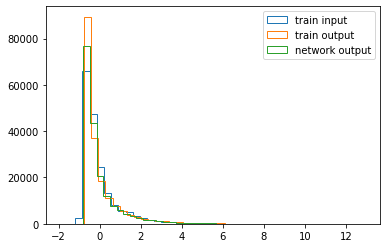

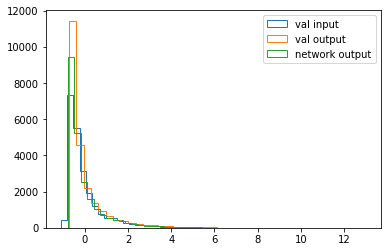

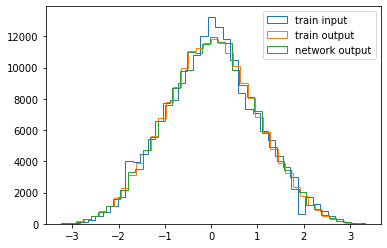

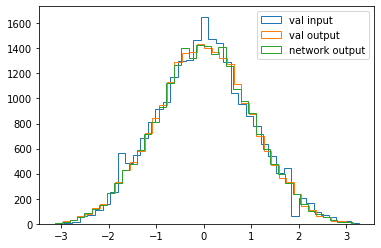

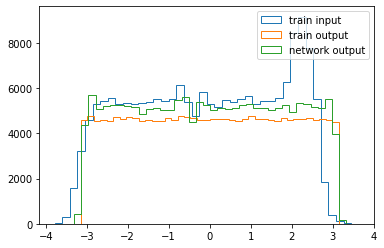

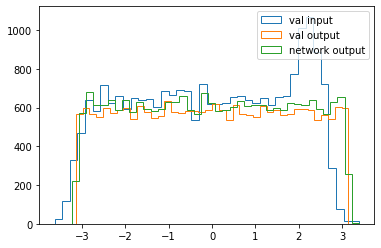

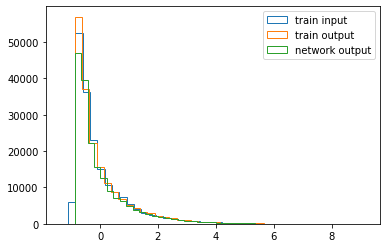

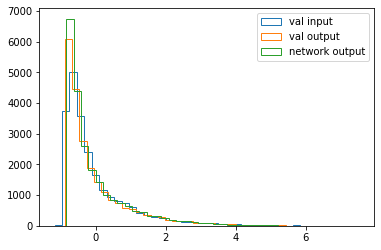

In [9]:
print(predictions.shape)
for x in range(4):
    plt.figure()
    plt.hist(trainIn.T[x], bins=40, label="train input", histtype="step")
    plt.hist(trainOut.T[x], bins=40, label="train output", histtype="step")
    plt.hist(predictions[x], bins=40, label="network output", histtype="step")
    plt.legend()
    plt.show()
    plt.figure()
    plt.hist(valIn.T[x], bins=40, label="val input", histtype="step")
    plt.hist(valOut.T[x], bins=40, label="val output", histtype="step")
    plt.hist(predictions2[x], bins=40, label="network output", histtype="step")
    plt.legend()
    plt.show()